In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Co-ocurrence analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot, heatmap

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

#
# Columns of the dataframe
#
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

## Authors vs Source Title example

In [3]:
#
# Top 10 most frequent authors
#
top_authors = df.documents_by_term('Authors').head(10).Authors
top_authors

0       Arevalo A.
1       Gabbouj M.
2     Hernandez G.
3     Hussain A.J.
4     Iosifidis A.
5    Kanniainen J.
6          Leon D.
7          Nino J.
8      Passalis N.
9      Sandoval J.
Name: Authors, dtype: object

In [4]:
#
# Top 10 most frequent Source titles
#
top_sources = df.documents_by_term('Source title').head(10)['Source title']
top_sources

0    Lecture Notes in Computer Science (including s...
1                     Expert Systems with Applications
2                                          IEEE Access
3                            Procedia Computer Science
4        Advances in Intelligent Systems and Computing
5                       Applied Soft Computing Journal
6                    Neural Computing and Applications
7       ACM International Conference Proceeding Series
8    Communications in Computer and Information Sci...
9    International Journal of Circuits, Systems and...
Name: Source title, dtype: object

In [5]:
matrix = df.co_occurrence(
    column_IDX="Authors", column_COL="Source title", as_matrix=True 
)
matrix = matrix.loc[top_authors, top_sources]
heatmap(matrix)

,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics),Expert Systems with Applications,IEEE Access,Procedia Computer Science,Advances in Intelligent Systems and Computing,Applied Soft Computing Journal,Neural Computing and Applications,ACM International Conference Proceeding Series,Communications in Computer and Information Science,"International Journal of Circuits, Systems and Signal Processing"
Arevalo A.,1,0,0,0,1,0,0,0,1,0
Gabbouj M.,0,0,0,0,0,0,0,0,0,0
Hernandez G.,1,0,0,0,1,0,0,0,1,0
Hussain A.J.,1,1,0,0,0,0,0,0,0,0
Iosifidis A.,0,0,0,0,0,0,0,0,0,0
Kanniainen J.,0,0,0,0,0,0,0,0,0,0
Leon D.,1,0,0,0,1,0,0,0,1,0
Nino J.,1,0,0,0,1,0,0,0,1,0
Passalis N.,0,0,0,0,0,0,0,0,0,0
Sandoval J.,1,0,0,0,1,0,0,0,1,0


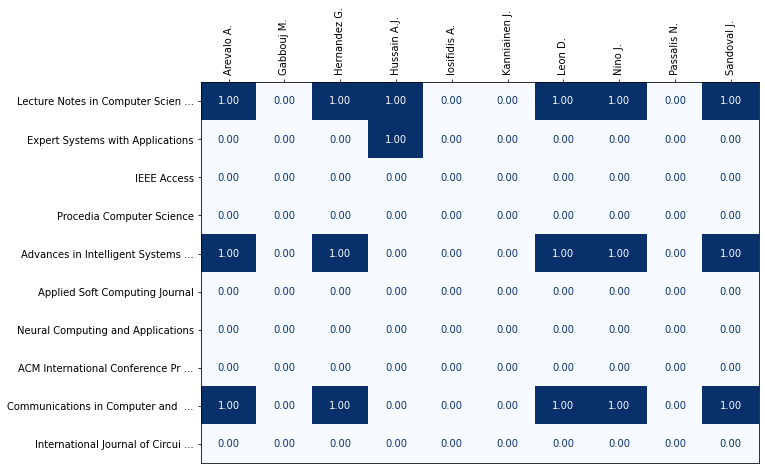

In [6]:
plt.figure(figsize=(10, 7))
Plot(matrix).heatmap(cmap='Blues')